<a href="https://colab.research.google.com/github/Saifullah785/intro-to-ml-with-python-notes-practice/blob/main/Chapter_02_Supervised_Learning/Chapter_02_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


# **Supervised Learning**

**Classification and Regression**

**Generalization, Overfitting and Underfitting**

**Relation of Model Complexity to Dataset Size**

# **Supervised Machine Learning Algorithms**

**Some Sample Datasets**

X.shape: (26, 2)


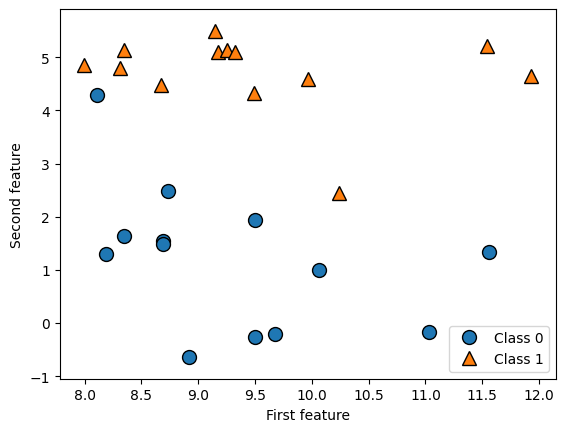

In [ ]:
# Generate dataset

X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:",X.shape)

Text(0, 0.5, 'Target')

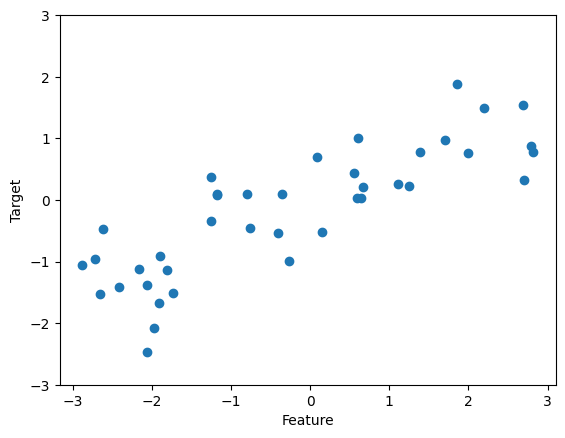

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("Shape of cancer data:", cancer.data.shape)
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [ ]:
# Not used in this notebook, but an example of another dataset.
# from sklearn.datasets import load_boston
# boston = load_boston()
# print("Data shape:", boston.data.shape)

In [ ]:
# Print sample counts per class
print('Sample counts per class:\n',{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [ ]:
# Print feature names
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Example of loading the boston dataset (commented out)
# from sklearn.datasets import load_boston
# boston = load_boston()
# print("Data shape:", boston.data.shape)

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
# df.head() # Removed as load_extended_boston returns a tuple, not a DataFrame with .head()
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (506, 104)
Shape of y: (506,)


#**K - Nearest Neighbors**

**k - Neighbors classification**

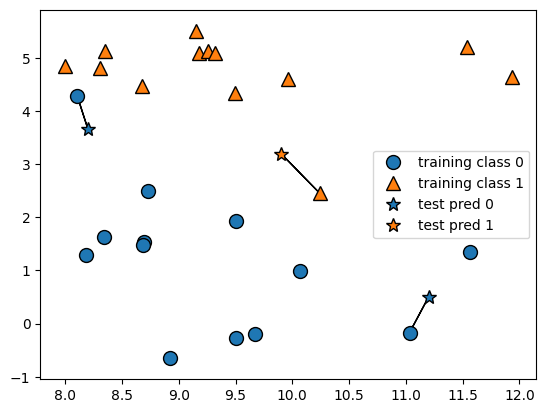

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

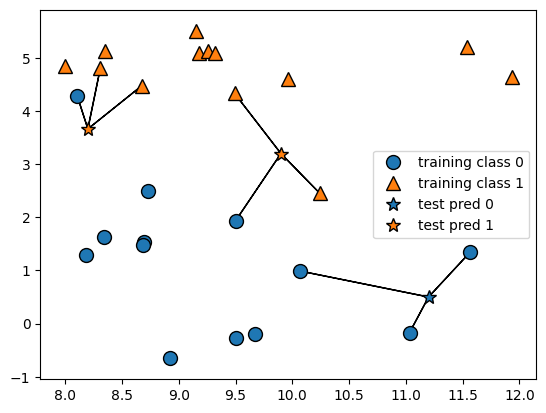

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate KNeighborsClassifier with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set
print('Test set predictions:', clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [ ]:
# Evaluate the classifier on the test set
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# **Analyzing KNeighborsClassifier**

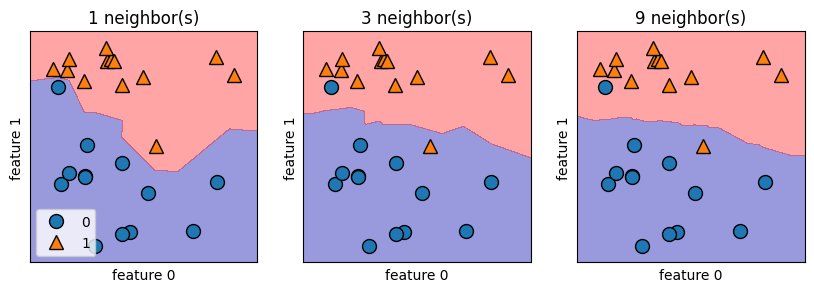

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))

    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


In [ ]:
# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# Split breast cancer data into training and test sets, stratifying by target
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [ ]:
# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Define the range of n_neighbors to explore
neighbors_settings = range(1, 11)

# Loop through different values of n_neighbors
for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit the model
    clf.fit(X_train, y_train)

    # Record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

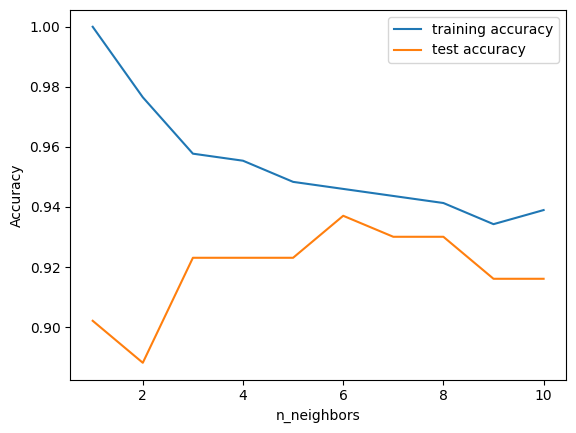

In [ ]:
# Plot training and test accuracy for different n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# **K-neighbors regression**

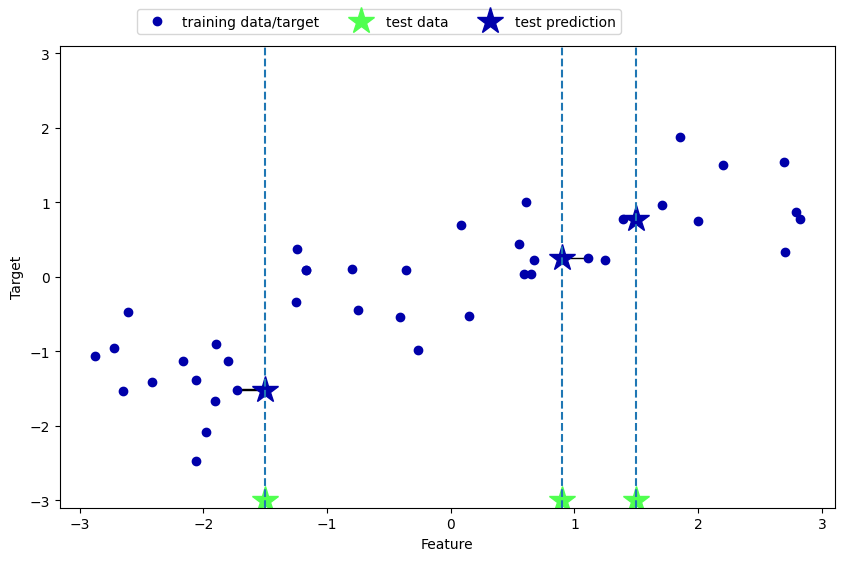

In [ ]:
# Plot k-NN regression with 1 neighbor
mglearn.plots.plot_knn_regression(n_neighbors=1)

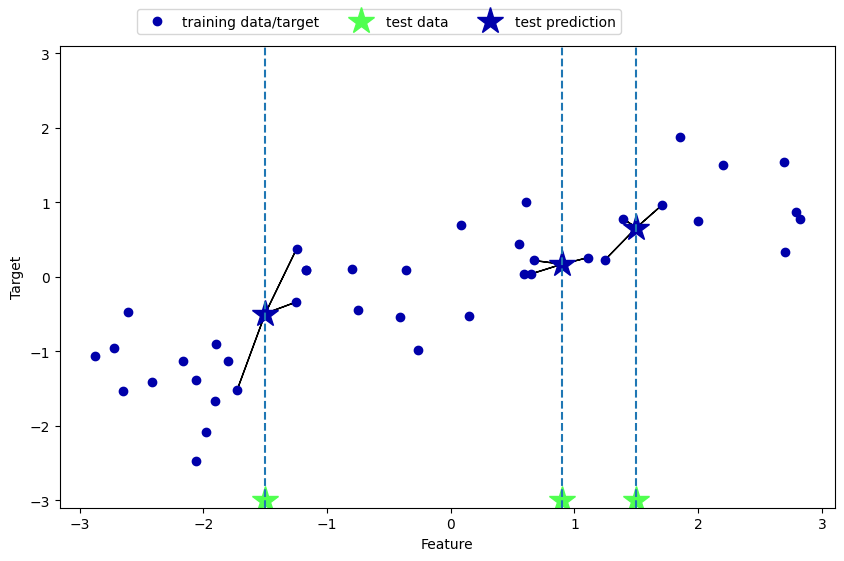

In [ ]:
# Plot k-NN regression with 3 neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Generate the wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Instantiate KNeighborsRegressor with 3 neighbors
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model to the training data
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Make predictions on the test set
print('Test set predictions:\n', reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [ ]:
# Evaluate the regressor on the test set using R^2 score
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# **Analyzing KNeighborsRegressor**

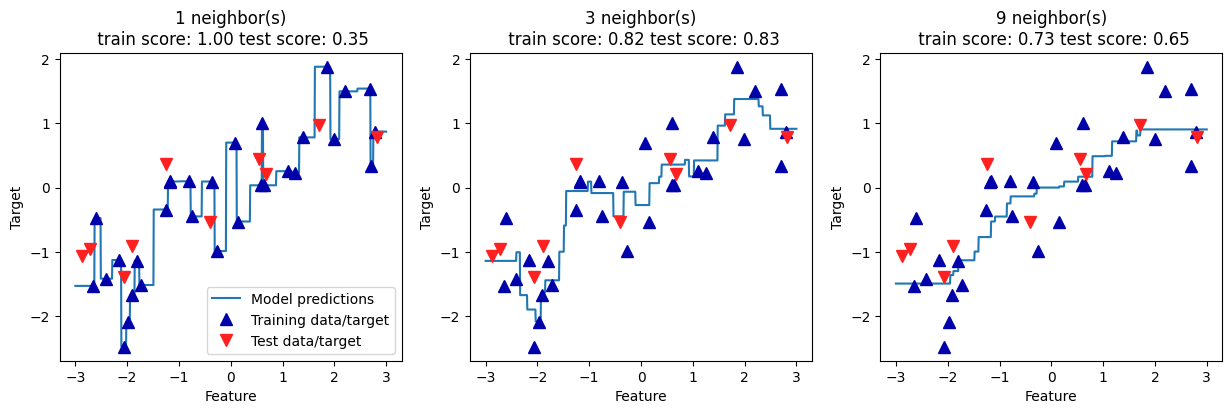

In [ ]:
# Analyze KNeighborsRegressor with different numbers of neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Create a line of data points to predict on (using the wave dataset range)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Generate the wave dataset again within this cell
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into training and test sets
X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(X_wave, y_wave, random_state=0)

# Iterate through different numbers of neighbors
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Instantiate and fit the regressor (using the wave dataset)
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train_wave, y_train_wave)

    # Plot the model's predictions on the wave dataset range
    ax.plot(line, reg.predict(line))
    # Plot the training data (from the wave dataset)
    ax.plot(X_train_wave, y_train_wave, '^', c=mglearn.cm2(0), markersize=8)

    # Plot the test data (from the wave dataset)
    ax.plot(X_test_wave, y_test_wave, 'v', c=mglearn.cm2(1), markersize=8)

    # Set the title with number of neighbors and scores
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train_wave, y_train_wave),
            reg.score(X_test_wave, y_test_wave)))
    # Set axis labels
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
# Add legend to the first subplot
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Strengths, weakness, and parameters


# **Linear Models**


**Linear models for regression**

w[0]: 0.393906  b: -0.031804


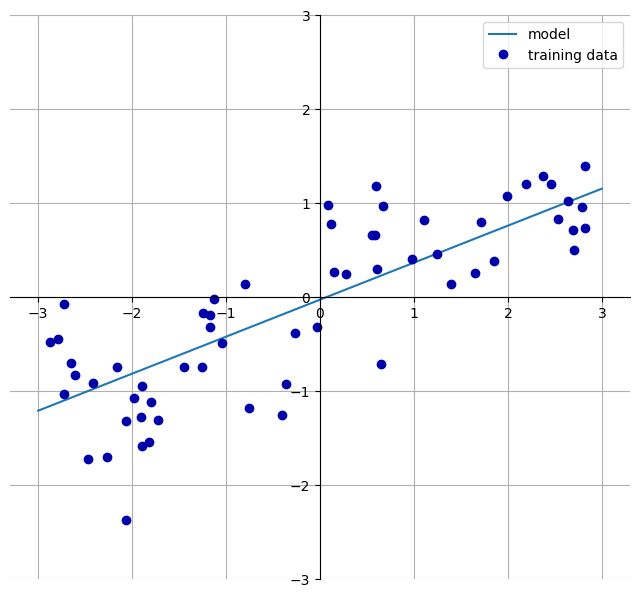

In [ ]:
mglearn.plots.plot_linear_regression_wave()

**Linear regression aka ordinary least squares**

In [ ]:
from sklearn.linear_model import LinearRegression

# Generate the wave dataset with 60 samples
X, y = mglearn.datasets.make_wave(n_samples=60)
# Split the data into training and test sets with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# Print the learned coefficient (slope)
print ("lr.coef_:", lr.coef_)
# Print the learned intercept (y-intercept)
print ("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [ ]:
# Evaluate the Linear Regression model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
# Evaluate the Linear Regression model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [ ]:
# Load the extended Boston housing dataset
X, y = mglearn.datasets.load_extended_boston()

# Split the data into training and test sets with a random state of 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate and fit the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# Evaluate the Linear Regression model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
# Evaluate the Linear Regression model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# **Ridge regression**

In [ ]:
from sklearn.linear_model import Ridge

# Instantiate and fit the Ridge regression model with default alpha (alpha=1.0)
ridge = Ridge().fit(X_train, y_train)
# Evaluate the Ridge model on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
# Evaluate the Ridge model on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [ ]:
# Instantiate and fit the Ridge regression model with alpha=10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
# Evaluate the Ridge model with alpha=10 on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
# Evaluate the Ridge model with alpha=10 on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))
#

Training set score: 0.79
Test set score: 0.64


In [ ]:
# Instantiate and fit the Ridge regression model with alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
# Evaluate the Ridge model with alpha=0.1 on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
# Evaluate the Ridge model with alpha=0.1 on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


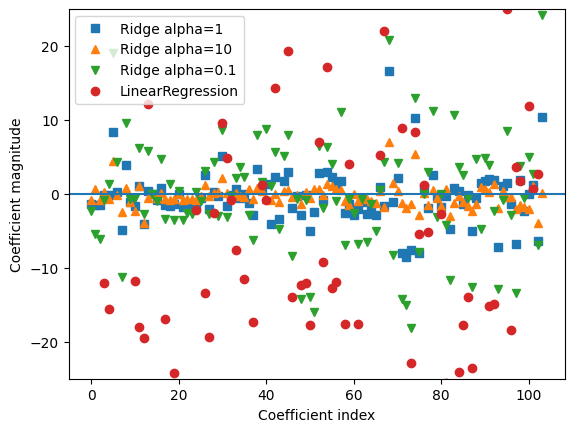

In [ ]:
# Plot the coefficients for different Ridge alpha values and Linear Regression
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

# Set the x-axis limits based on the current plot
xlims = plt.xlim()
# Draw a horizontal line at y=0
plt.hlines(0, xlims[0], xlims[1])
# Set the x-axis limits back to the original values
plt.xlim(xlims)
# Set the y-axis limits
plt.ylim(-25, 25)
# Add a legend to the plot
plt.legend()

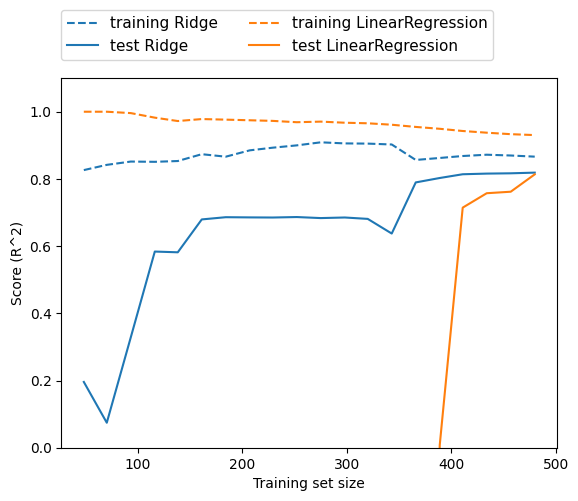

In [ ]:
# Plot the effect of n_samples on Ridge regression
mglearn.plots.plot_ridge_n_samples()
#

# **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

# Instantiate and fit the Lasso regression model with default alpha (alpha=1.0)
lasso = Lasso().fit(X_train, y_train)
# Evaluate the Lasso model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
# Evaluate the Lasso model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso.coef_ != 0))
#

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

# Instantiate and fit the Lasso regression model with alpha=0.01 and increased max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# Evaluate the Lasso model with alpha=0.01 on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
# Evaluate the Lasso model with alpha=0.01 on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [ ]:
# Instantiate and fit the Lasso regression model with alpha=0.0001 and increased max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
# Evaluate the Lasso model with alpha=0.0001 on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
# Evaluate the Lasso model with alpha=0.0001 on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso00001.coef_ != 0))
#

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

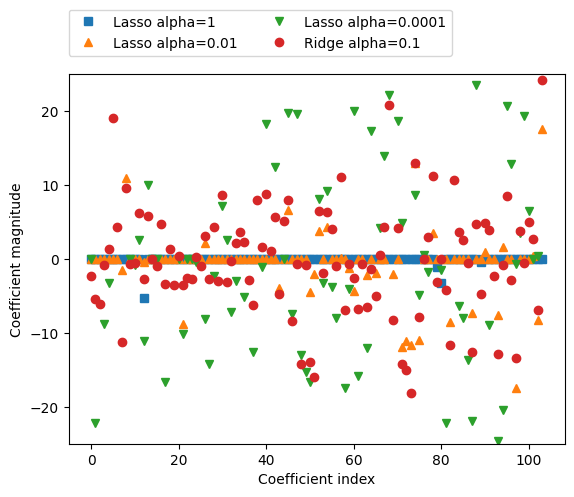

In [ ]:
# Plot the coefficients for different Lasso alpha values and Ridge alpha=0.1
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
# Add a legend to the plot with 2 columns and adjusted location
plt.legend(ncol=2, loc=(0, 1.05))
# Set the y-axis limits
plt.ylim(-25, 25)
# Set the x-axis label
plt.xlabel('Coefficient index')
# Set the y-axis label
plt.ylabel('Coefficient magnitude')

# **Linear model for classification**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Import necessary libraries: LogisticRegression for linear classification and LinearSVC for linear support vector classification.

In [ ]:
# Generate a synthetic dataset for classification
X, y = mglearn.datasets.make_forge()

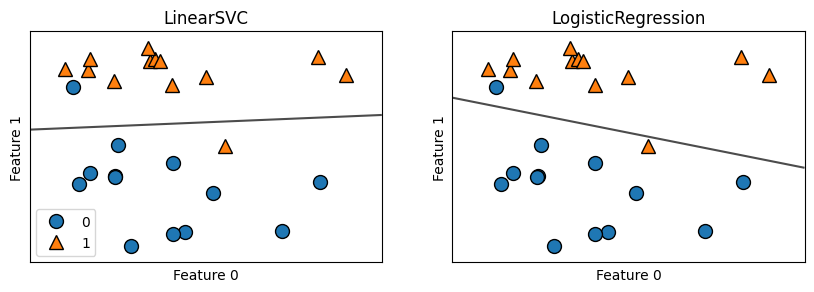

In [ ]:
# Create subplots to visualize the decision boundaries of LinearSVC and LogisticRegression
fig, axes = plt.subplots(1,2, figsize=(10,3))

# Iterate over both models and plot their decision boundaries
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y) # Fit the model to the data
    # Plot the decision boundary
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax,
                                    alpha=.7)
    # Plot the data points
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    # Set the title of the subplot to the model name
    ax.set_title("{}".format(clf.__class__.__name__))
    # Set the x-axis label
    ax.set_xlabel('Feature 0')
    # Set the y-axis label
    ax.set_ylabel('Feature 1')
# Add a legend to the first subplot
axes[0].legend()

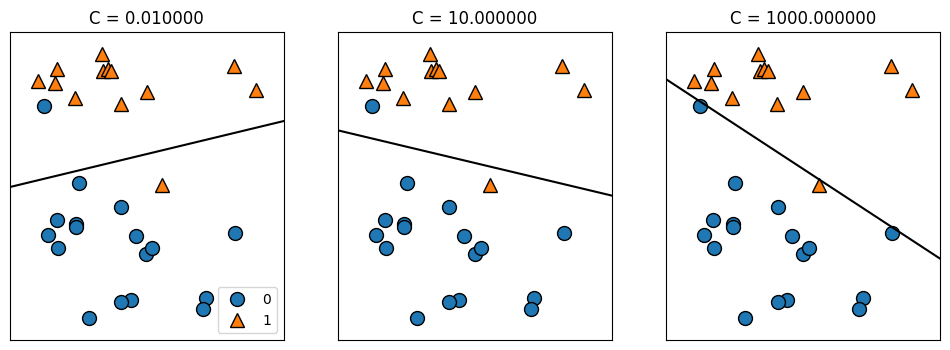

In [ ]:
# Plot the effect of regularization (C parameter) on LinearSVC
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
# Load the breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# Split the breast cancer data into training and test sets, stratifying by target to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [ ]:
# Instantiate and fit a Logistic Regression model with default parameters
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the training and test set scores (accuracy) for the Logistic Regression model
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


In [ ]:
# Instantiate and fit a Logistic Regression model with C=100 (less regularization)
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the training and test set scores (accuracy) for the Logistic Regression model with C=100
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.958


In [ ]:
# Instantiate and fit a Logistic Regression model with C=0.01 (more regularization)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# Print the training and test set scores (accuracy) for the Logistic Regression model with C=0.01
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


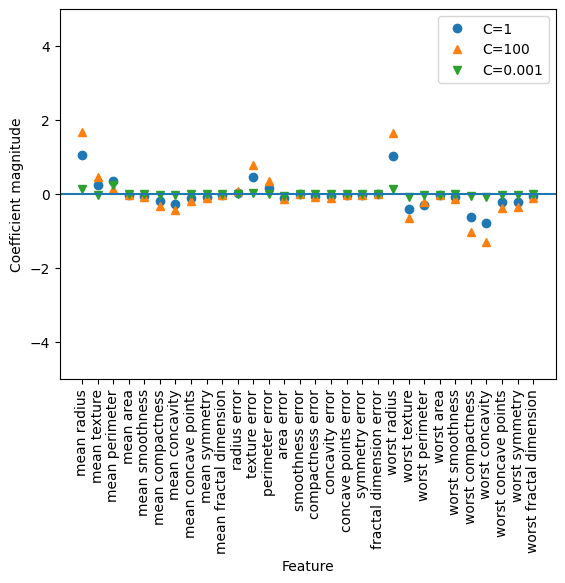

In [ ]:
# Plot the coefficients learned by Logistic Regression for different values of C
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
# Set x-axis ticks to feature names and rotate them for readability
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
# Get current x-axis limits
xlims = plt.xlim()
# Draw a horizontal line at y=0
plt.hlines(0, xlims[0], xlims[1])
# Restore original x-axis limits
plt.xlim(xlims)
# Set y-axis limits
plt.ylim(-5, 5)
# Set x-axis label
plt.xlabel('Feature')
# Set y-axis label
plt.ylabel('Coefficient magnitude')
# Add a legend to the plot
plt.legend()
#

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


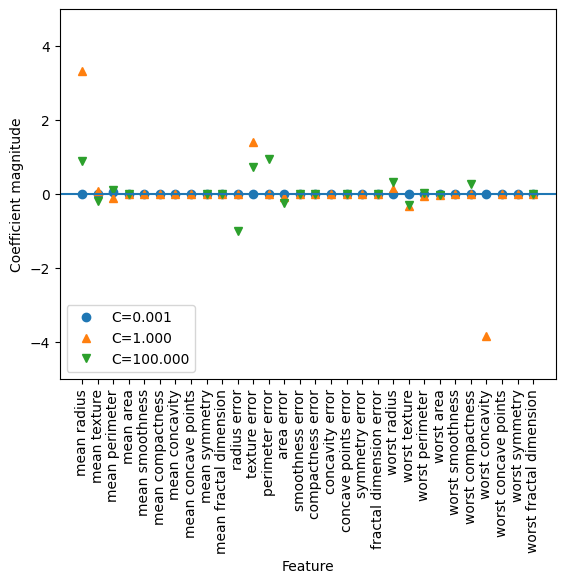

In [ ]:
# Analyze the effect of L1 regularization on Logistic Regression coefficients for different C values
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    # Instantiate and fit Logistic Regression with L1 penalty and 'liblinear' solver
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    # Print training and test accuracy for the current C value
    print('Training accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))

    # Plot the coefficients for the current C value
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

# Set x-axis ticks to feature names and rotate them
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
# Get current x-axis limits
xlims = plt.xlim()
# Draw a horizontal line at y=0
plt.hlines(0, xlims[0], xlims[1])
# Restore original x-axis limits
plt.xlim(xlims)
# Set x-axis label
plt.xlabel('Feature')
# Set y-axis label
plt.ylabel('Coefficient magnitude')

# Set y-axis limits
plt.ylim(-5, 5)
# Add a legend to the plot with location adjusted
plt.legend(loc=3)
#

# **Linear models for multiclass classification**

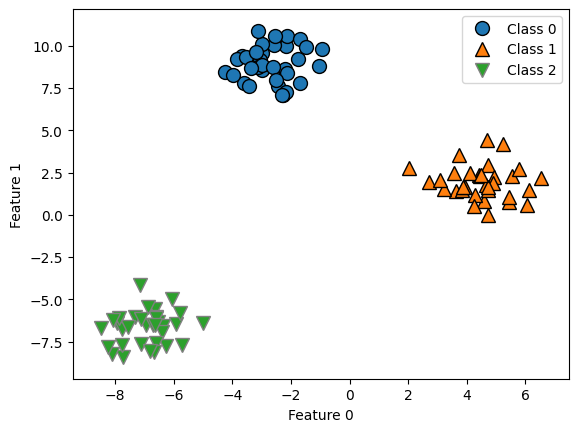

In [ ]:
# Generate a synthetic dataset with 3 classes for multiclass classification
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
# Plot the generated data points with different colors for each class
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')
# Add a legend to identify the classes
plt.legend(['Class 0', 'Class 1', 'Class 2'])
#

In [ ]:
# Instantiate and fit a Linear Support Vector Classifier (LinearSVC) for multiclass classification
linear_svm = LinearSVC().fit(X, y)
# Print the shape of the learned coefficients
print('Coefficient shape:', linear_svm.coef_.shape)
# Print the shape of the learned intercepts
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


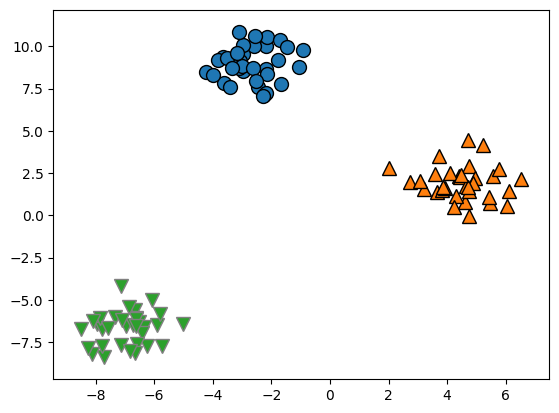

In [ ]:
# Plot the data points for multiclass classification
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Create a line of data points for plotting decision boundaries
line = np.linspace(-15, 15)

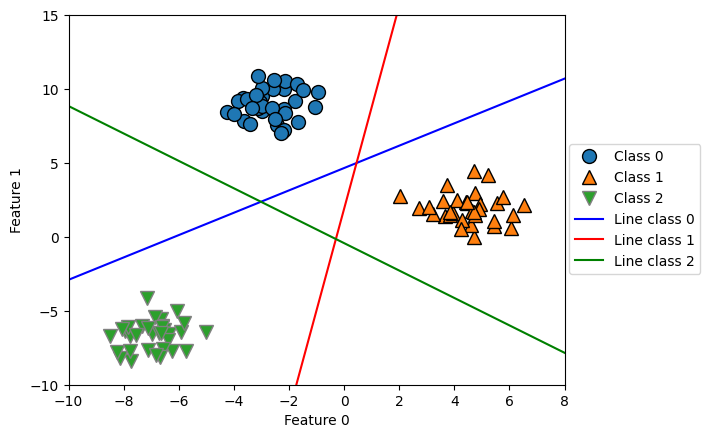

In [ ]:
# Plot the data points and the decision boundaries for the LinearSVC multiclass classifier
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Create a line of data points for plotting decision boundaries
line = np.linspace(-15, 15)
# Iterate through the coefficients and intercepts for each class to plot their decision boundaries
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    # Plot the decision boundary line
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    # Set y-axis limits
    plt.ylim(-10, 15)
    # Set x-axis limits
    plt.xlim(-10, 8)
    # Set x-axis label
    plt.xlabel('Feature 0')
    # Set y-axis label
    plt.ylabel('Feature 1')
    # Add a legend to the plot
    plt.legend(['Class 0', 'Class 1', 'Class 2','Line class 0','Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

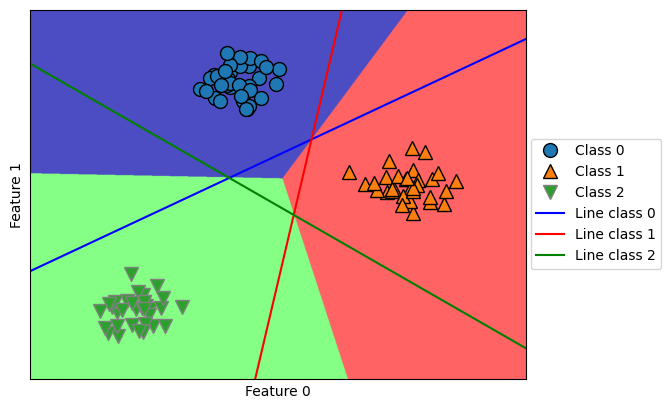

In [ ]:
# Visualize the decision regions and boundaries for the LinearSVC multiclass classifier
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
# Plot the data points on top of the decision regions
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Create a line of data points for plotting decision boundaries
line = np.linspace(-15, 15)
# Iterate through coefficients and intercepts for each class to plot decision boundaries
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    # Plot the decision boundary line
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

# Add a legend to the plot
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],
           loc=(1.01, 0.3))
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')
#

**Strengths, weaknesses and parameters**

In [ ]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Naive Bayes Classifiers**

In [ ]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [ ]:
X

array([[0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

In [ ]:
y

array([0, 1, 0, 1])

In [ ]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n', counts)

Feature counts:
 {np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


# **Decision trees**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os

In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor',
 '/root/.ipython']

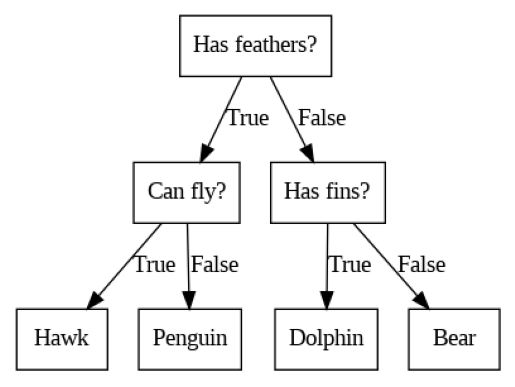

In [ ]:
# Plot a decision tree illustrating the classification of animals
mglearn.plots.plot_animal_tree()
#

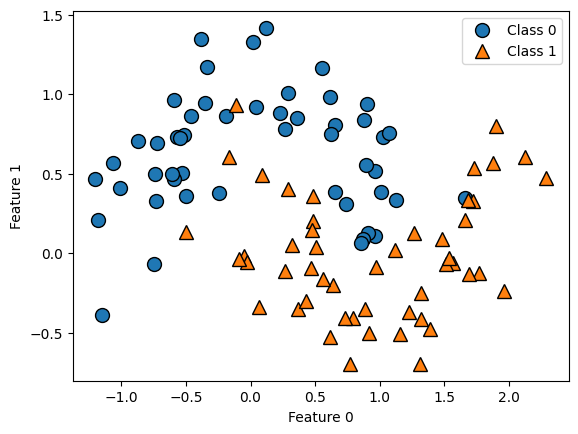

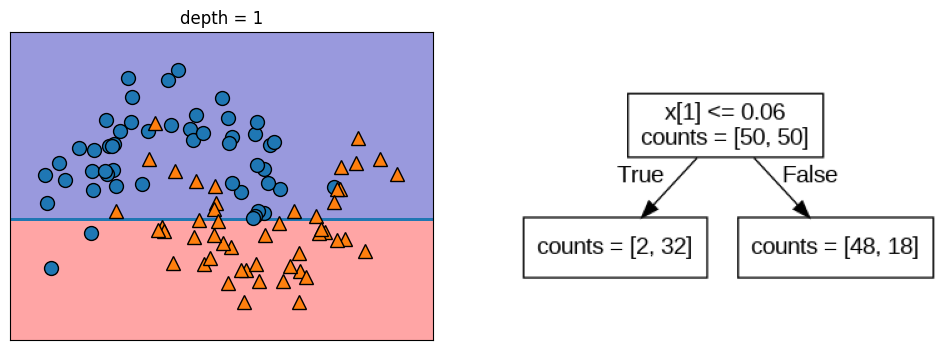

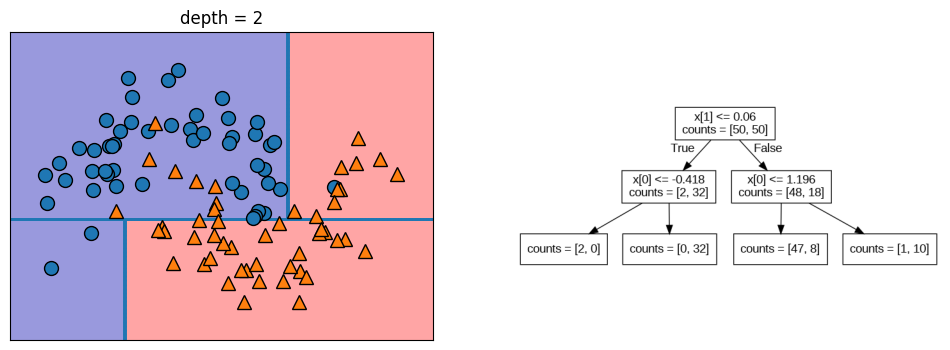

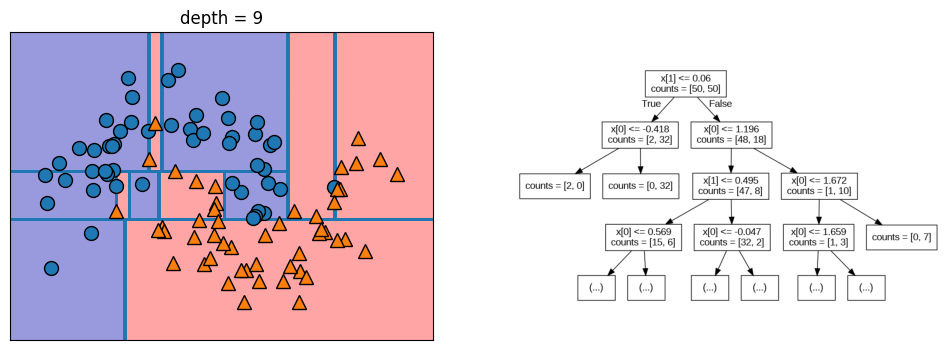

In [ ]:
# Plot a series of decision trees showing how the decision boundary changes with increasing depth
mglearn.plots.plot_tree_progressive()

**Controlling complexity of decision trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Load the breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# Load the breast cancer dataset and split it into training and testing sets
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [ ]:
# Instantiate and fit a Decision Tree Classifier with a random state for reproducibility
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Evaluate the accuracy of the unfettered Decision Tree on the training and test sets
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


In [ ]:
# Instantiate and fit a Decision Tree Classifier with a maximum depth of 4 to limit complexity
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
# Evaluate the accuracy of the Decision Tree with max_depth=4 on the training and test sets
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


# **Analyzing Decision Trees**

In [ ]:
from sklearn.tree import export_graphviz

# Export the trained Decision Tree to a .dot file for visualization
export_graphviz(tree, out_file='tree.dot', class_names=['malignant','benign'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

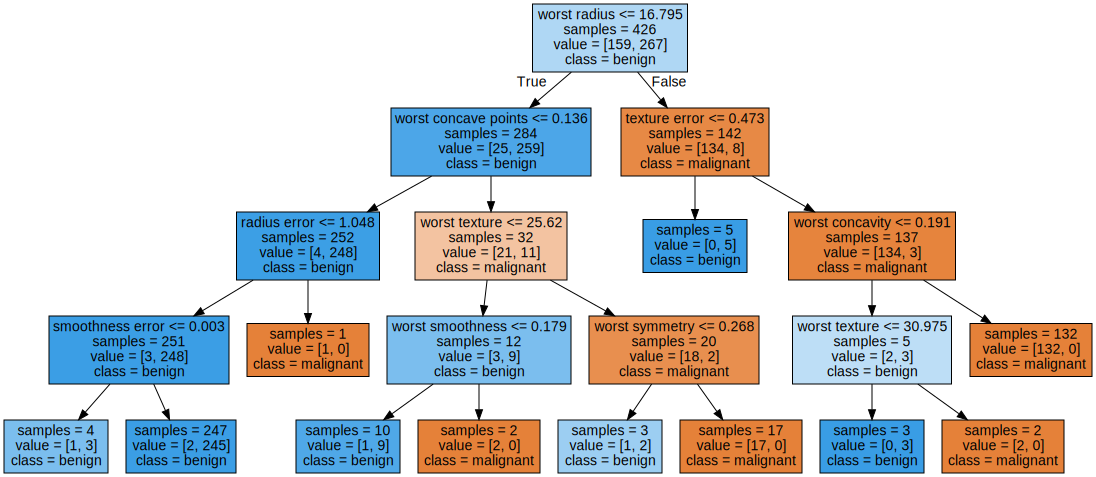

In [ ]:
import graphviz

# Read the .dot file and display the decision tree visualization
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

**Feature Importance in trees**

In [ ]:
# Print the feature importances calculated by the Decision Tree model
print('Feature importances: ')
print(tree.feature_importances_)

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [ ]:
def plot_feature_importances_cancer(model):
    # Define a function to plot the feature importances for the breast cancer dataset
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

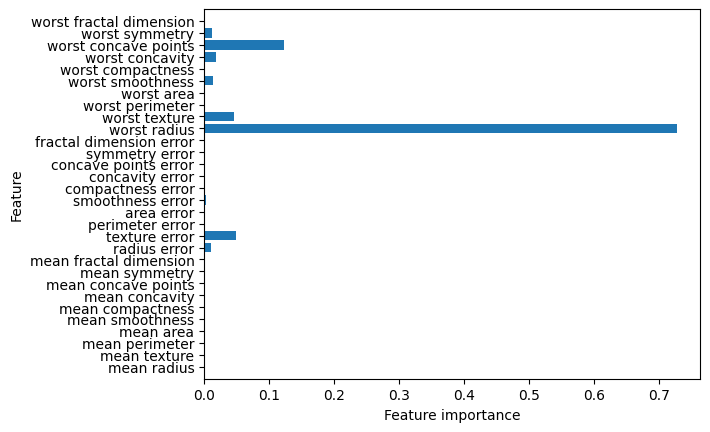

In [ ]:
# Plot the feature importances for the trained Decision Tree model on the breast cancer dataset
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


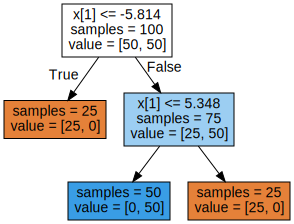

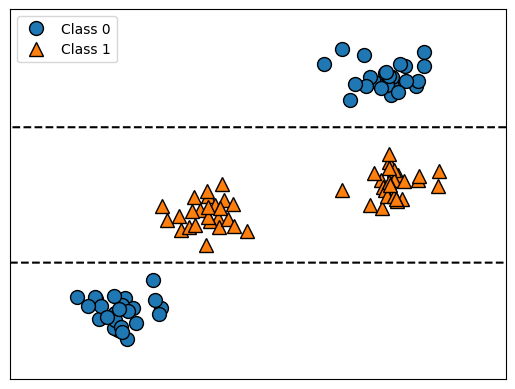

In [ ]:
# Plot a decision tree that illustrates a non-monotone relationship
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [ ]:
import os
# Load the ram price dataset
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

Text(0, 0.5, 'Price in $/Mbyte')

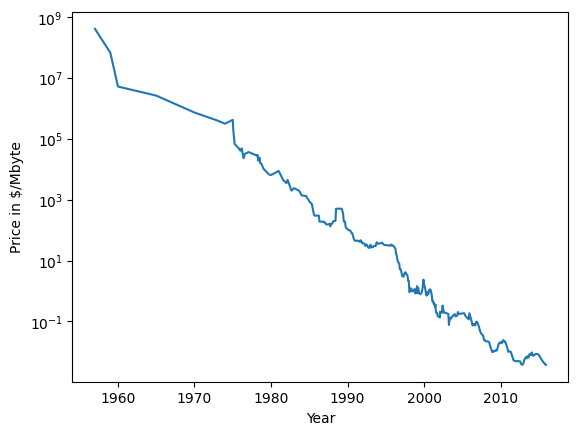

In [ ]:
# Plot the ram prices over time on a semilogarithmic scale
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Split the ram price data into training and test sets based on the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [ ]:
# Prepare the training data for the models
X_train = data_train.date.values[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

In [ ]:
# Instantiate and fit a Decision Tree Regressor and a Linear Regression model to the training data
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Prepare all date data for prediction
X_all = ram_prices.date.values[:, np.newaxis]

In [ ]:
# Make predictions on all date data using both models
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [ ]:
# Convert the log-transformed predictions back to the original price scale
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

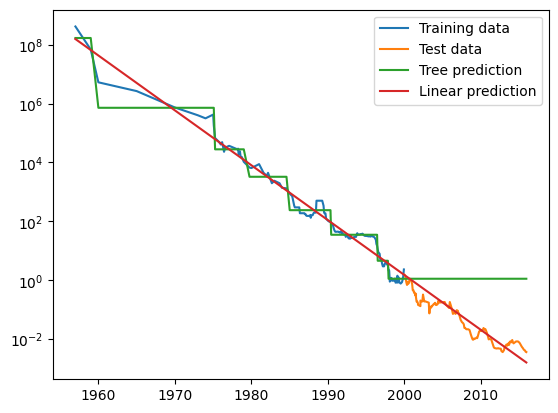

In [ ]:
# Plot the original training and test data, along with the predictions from both models
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()

# **Ensembles of Decision Trees**

Random forests

Building random forests

Analyzing random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset with make_moons for binary classification
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# Split the data into training and test sets, stratifying by y to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Instantiate a RandomForestClassifier with 5 estimators (decision trees) and a random state for reproducibility
forest = RandomForestClassifier(n_estimators=5, random_state=2)
# Fit the random forest model to the training data
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer

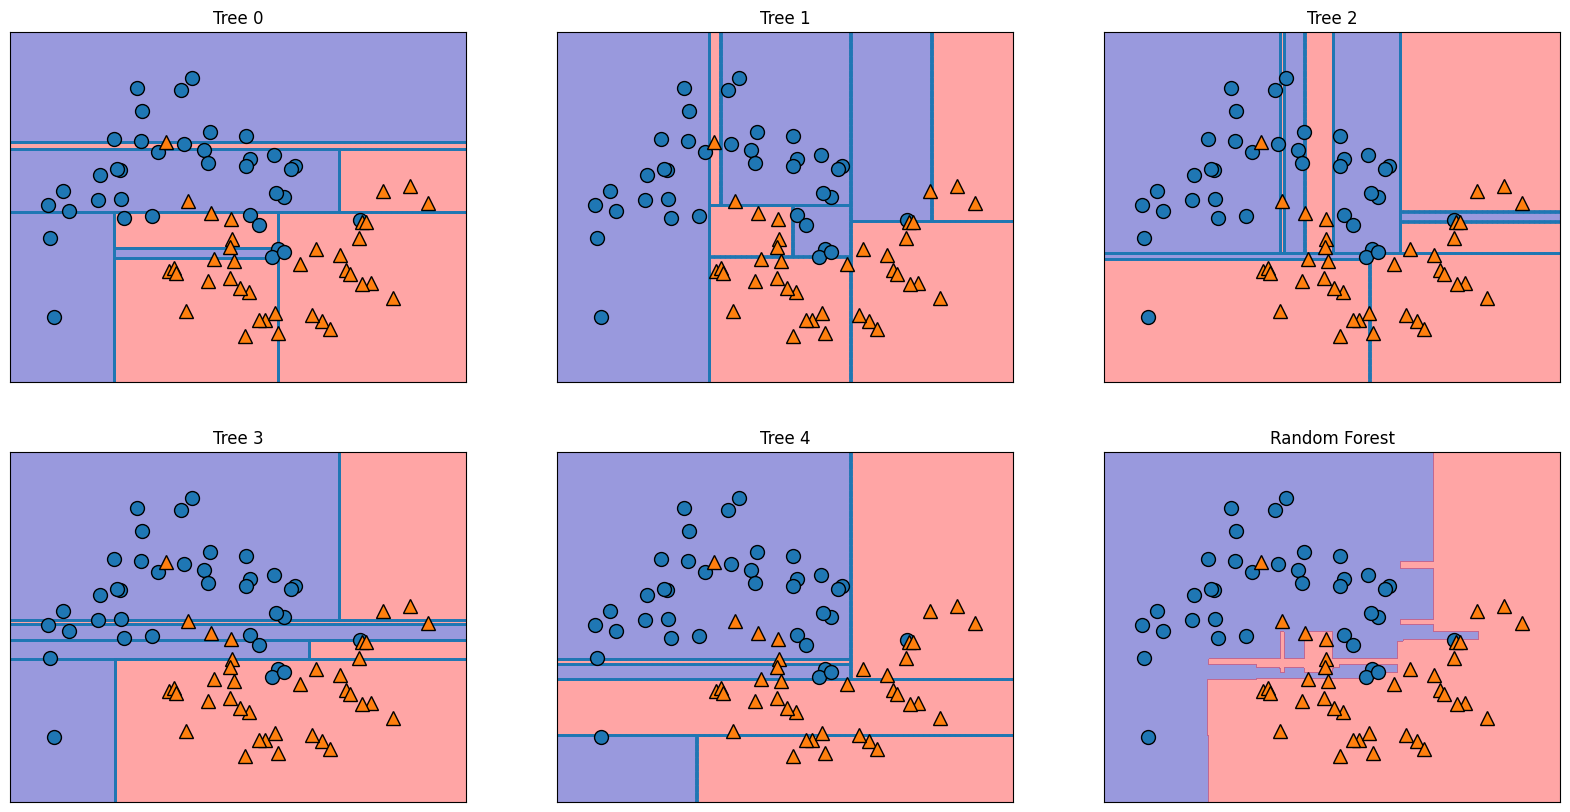

In [ ]:
# Create a figure and axes for plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# Iterate over the individual trees in the random forest and the axes to plot them
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    # Set the title for each subplot to indicate the tree number
    ax.set_title('Tree {}'.format(i))
    # Plot the decision boundaries of the individual tree
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

# Plot the decision boundary of the random forest ensemble
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)

# Set the title for the random forest subplot
axes[-1, -1].set_title('Random Forest')
# Plot the training data points
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the breast cancer data into training and test sets with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Instantiate a RandomForestClassifier with 100 estimators and a random state
forest = RandomForestClassifier(n_estimators=100, random_state=0)
# Fit the random forest model to the training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Print the accuracy of the random forest model on the training subset
print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
# Print the accuracy of the random forest model on the test subset
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


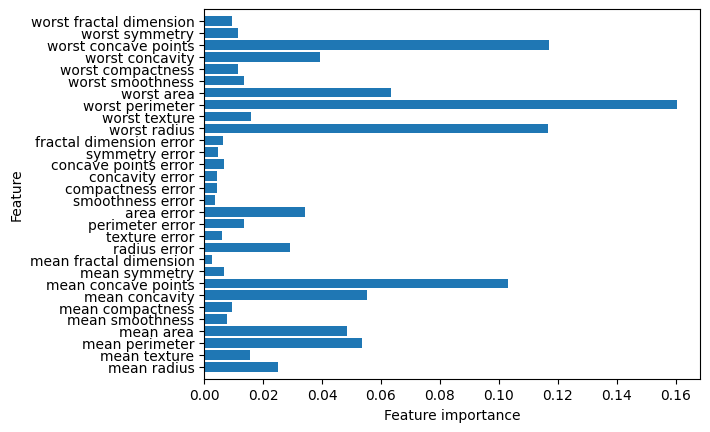

In [ ]:
# Plot the feature importances for the trained random forest model on the breast cancer dataset
plot_feature_importances_cancer(forest)

# **Gradient Boosted Regression Trees (Gradient Boosting Machines)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the breast cancer data into training and test sets with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# Instantiate a GradientBoostingClassifier with default parameters and a random state
gbrt = GradientBoostingClassifier(random_state=0)
# Fit the gradient boosting model to the training data
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# Print the accuracy of the gradient boosting model on the training set
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
# Print the accuracy of the gradient boosting model on the test set
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [ ]:
# Instantiate a GradientBoostingClassifier with a maximum depth of 1 and a random state
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
# Fit the gradient boosting model to the training data
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [ ]:
# Print the accuracy of the gradient boosting model with max_depth=1 on the training set
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
# Print the accuracy of the gradient boosting model with max_depth=1 on the test set
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [ ]:
# Instantiate a GradientBoostingClassifier with a learning rate of 0.01 and a random state
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
# Fit the gradient boosting model to the training data
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [ ]:
# Print the accuracy of the gradient boosting model with learning_rate=0.01 on the training set
print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train, y_train)))
# Print the accuracy of the gradient boosting model with learning_rate=0.01 on the test set
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


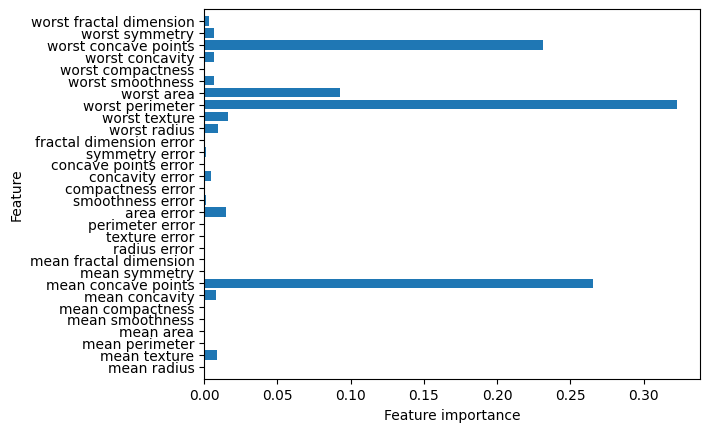

In [ ]:
# Instantiate a GradientBoostingClassifier with a maximum depth of 1 and a random state
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
# Fit the gradient boosting model to the training data
gbrt.fit(X_train, y_train)

# Plot the feature importances for the trained gradient boosting model on the breast cancer dataset
plot_feature_importances_cancer(gbrt)

# **Kernelized Support Vector Machines**

**Linear Models and Non Linear Features**

Text(0, 0.5, 'Feature 1')

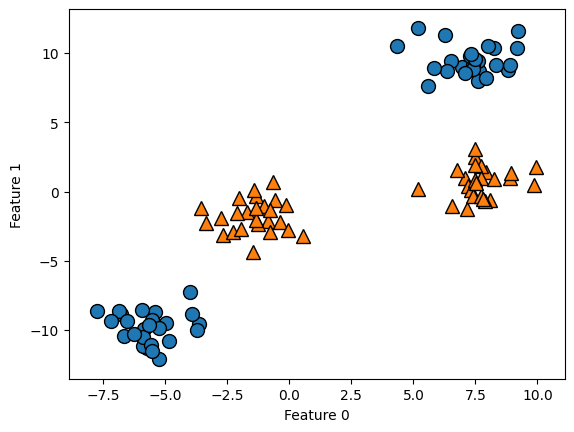

In [23]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

# Generate a synthetic dataset with 4 centers
X, y = make_blobs(centers=4, random_state=8)
# Transform the labels to create a binary classification problem
y = y % 2

# Plot the generated data points
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

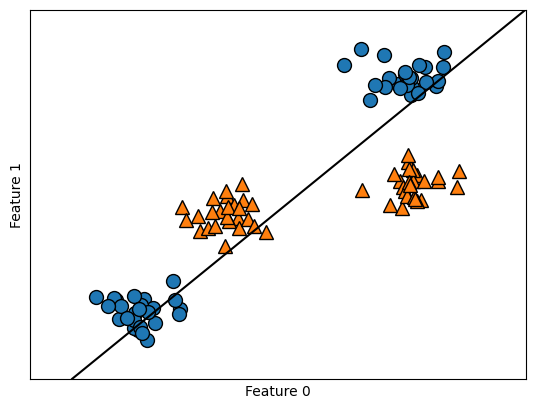

In [24]:
# Import Linear Support Vector Classifier
from sklearn.svm import LinearSVC
# Instantiate and fit a LinearSVC model to the data
linear_svm = LinearSVC().fit(X, y)

# Plot the decision boundary of the LinearSVC model
mglearn.plots.plot_2d_separator(linear_svm, X)
# Plot the data points on top of the decision boundary
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')

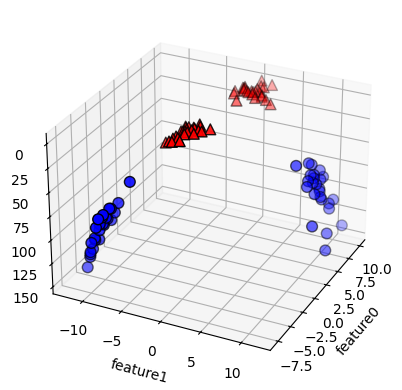

In [25]:
# Add a new feature to the data: the square of the second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

# Import necessary modules for 3D plotting
from mpl_toolkits.mplot3d import Axes3D, axes3d
# Create a new figure
figure = plt.figure()
# Add a 3D subplot to the figure
ax = figure.add_subplot(projection='3d', elev=-152, azim=-26)
# Create a mask to separate points based on their class label
mask = y == 0
# Plot points of class 0 in blue
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
# Plot points of class 1 in red
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')
# Set x-axis label for the 3D plot
ax.set_xlabel("feature0")
# Set y-axis label for the 3D plot
ax.set_ylabel("feature1")
# Set z-axis label for the 3D plot
ax.set_zlabel("feature1 ** 2")
# Save the 3D plot to a file
plt.savefig("3d_plot.png")
# Display the plot
plt.show()

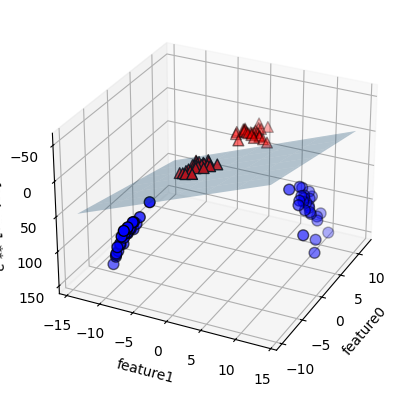

In [26]:
# Instantiate and fit a LinearSVC model to the data with the new feature
linear_svm_3d = LinearSVC().fit(X_new, y)
# Get the coefficients and intercept of the fitted model
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Create a new figure for the 3D plot of the decision boundary
figure = plt.figure()
# Add a 3D subplot to the figure
ax = figure.add_subplot(projection='3d', elev=-152, azim=-26)
# Create a grid of x and y values for plotting the surface
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
# Calculate the corresponding z values for the decision boundary plane
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
# Plot the decision boundary surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
# Plot the data points of class 0 in blue
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           s=60, edgecolor='k')
# Plot the data points of class 1 in red
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           s=60, edgecolor='k')
# Set x-axis label for the 3D plot
ax.set_xlabel("feature0")
# Set y-axis label for the 3D plot
ax.set_ylabel("feature1")
# Set z-axis label for the 3D plot
ax.set_zlabel("feature1 ** 2")
# Save the 3D plot to a file
plt.savefig("3d_plot.png")
# Display the plot
plt.show()

Text(0, 0.5, 'Feature 1')

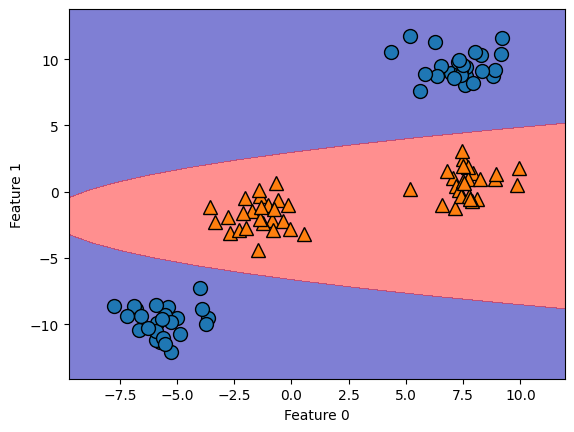

In [27]:
# Calculate the decision function values for the grid points
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), (YY ** 2).ravel()])
# Plot the contour of the decision boundary in the original 2D space
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
# Plot the data points on top of the contour plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')

# **The Kernel Trick**

Understanding SVMs

Text(0, 0.5, 'Feature 1')

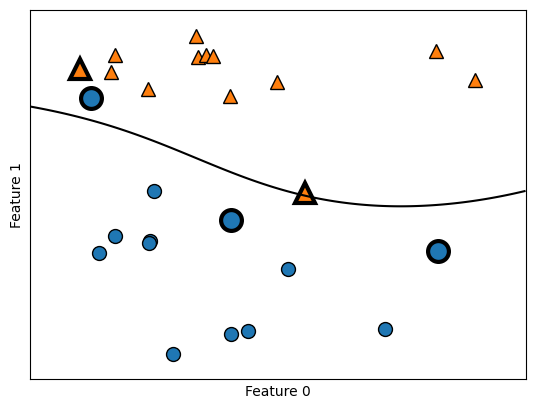

In [28]:
# Import Support Vector Classifier
from sklearn.svm import SVC

# Generate a handcrafted dataset for visualization
X, y = mglearn.tools.make_handcrafted_dataset()
# Instantiate and fit an SVC model with RBF kernel
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
# Plot the decision boundary of the SVC model
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# Plot the data points
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Get the support vectors of the SVM model
sv = svm.support_vectors_

# Get the labels of the support vectors based on the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
# Plot the support vectors, highlighting them
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
# Set x-axis label
plt.xlabel('Feature 0')
# Set y-axis label
plt.ylabel('Feature 1')
#